In [1]:
import pandas as pd
import numpy as np
from scipy import stats

**Tópicos**:
 - Tipos de variáveis
 - Medidas-Resumo:
     - Medidas de Tendência Central
     - Medidas de Dispersão
     - Quantis, Quartis e Percentis
 - Análise Bidimensional:
     - Associação Entre Variáveis Qualitativas
     - Associação Entre Variáveis Quantitativas (parte I)
 - Matriz de Correlação
 - Exercício

# Tipos de Variáveis

A ferramenta de trabalho do cientista são os dados disponíveis. Dessa forma, precisamos entender um pouco sobre as possíveis naturezas que os dados podem assumir.

Basicamente, as variáveis são classificadas em qualitativas e quantitativas.

> **Qualitativa**: Qualidade/Característica que não se pode medir.


> **Quantitativa**: Atributo/Característica que pode ser medido(a)

Dentro de variáveis qualitativas ainda podemos ter a seguinte subdivisão:

> **Nominal**: Não é possível criar ordenação. Exemplo: Cor dos olhos 

> **Ordinal**: É possível ordenar. Exemplo: Nível de Escolaridade, Cargos em uma empresa (C-Level, Head, Gerente, Tech Lead)

Por sua vez, as variáveis quantitativas possuem a seguinte subdivisão:

> **Discreta**: Resultam geralmente de uma contagem. Exemplo: Número de Filhos, Número de Gols

> **Contínua**: O valor percente aos números reais e resultam geralmente de uma mensuração. Exemplo: Altura, Peso.

![](https://www.researchgate.net/profile/Marcel_Queiroz2/publication/311607483/figure/fig4/AS:438948062339075@1481664781910/Figura-15-Classificacao-dos-principais-tipos-de-variaveis-Triola-2005-3-Bastos.png)

Para cada tipo de variável existem métodos e técnicas apropriadas para resumir e investigar relações. Em alguns momentos, poderemos adaptar algumas técnicas usadas em um caso para o outro.

# Medidas-Resumo

Uma medida-resumo é um valor que traz uma característica capaz de resumir um conjuntos de dados. Podemos dividí-las entre medidas de posição e medidas de dispersão. Vamos ver um pouquinho delas.

## Medidas de Tendência Central

Basicamente, nos deparamos com três medidas de tendência central:
* Média
* Mediana
* Moda

### Média

![](https://www.estudopratico.com.br/wp-content/uploads/2014/05/media-aritmetica-simples.jpg)

A média, apesar de bastante utilizada, é fortemente influenciada por outliers.

In [2]:
# calculando média com numpy
np.mean([1,2,3,4,5,10,100])

17.857142857142858

### Mediana

A outra medida utilizada como representante de um conjunto de dados é a mediana. Diferentemente da média, essa estatística sofre menos com outliers.

Depois de ordenar o conjunto de dados em ordem crescente ou decrescente, a mediana será o valor que divide nosso conjunto em 2: 50% acima e 50% abaixo desse valor.

In [3]:
np.median([1,2,3,4,5,10,100])

4.0

### Moda

A moda é a observação mais comum do nosso conjunto de dados e é mais utilizada em dados qualitativos ou quando os dados quantitativos são discretos

In [4]:
# Qual a cor mais comum?
stats.mode(['verde','azul','verde','verde'])

ModeResult(mode=array(['verde'], dtype='<U5'), count=array([3]))

## Medidas de Dispersão

Por qual motivo precisamos de medidas de dispersão?

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/WrappedNormalPDF.png/1200px-WrappedNormalPDF.png)

Não importa conhecer só a média, precisamos entender a variabilidade dos dados em torno dessa média.

### Amplitude

Uma das medidas que utilizamos para ter noção da variabilidade é a amplitude. Ela é simplesmente a diferença entre os valores máximo e mínimo da série de dados.

In [5]:
lista = [1,2,3,4,5,6,7]

In [6]:
amplitude = np.max(lista) - np.min(lista)

In [7]:
amplitude

6

### Variância Amostral

A amplitude não leva em consideração a média para seu cálculo. A variância, por sua vez, mede o grau de distância entre os pontos e a média.

![](https://linkconcursos.com.br/wp-content/uploads/2013/03/varianciadaamostra.jpg)

In [8]:
lista2 = np.array([1,2,3,4,5])

In [9]:
# extraindo a média da amostra
media_lista2 = np.mean(lista2)

In [10]:
# extraindo os desvios ao quadrado da média
desvios_quadrado = (lista2 - media_lista2)**2

In [11]:
desvios_quadrado

array([4., 1., 0., 1., 4.])

In [12]:
# somando os devios e dividindo por n-1
np.sum(desvios_quadrado)/(len(desvios_quadrado) -1)

2.5

### Desvio Padrão Amostal

Uma das dificuldades de se utilizar a variância é que, por ter a potenciação ao quadrado, seu resultado não é expresso nas unidades originais. Se tivermos a variável salário, por exemplo, a variância será em salários^2.

Para vencer esse fator, o desvio padrão simplesmente é colocado como a raiz quadrada da variância.

In [13]:
(lista2.std(ddof=1))**2

2.5000000000000004

## Quantis, Percentis e Quartis

Mesmo com as medidas de tendência central e variabilidade, falta representar a simetria da distribuição dos dados.

Nós comentamos que a mediana é o valor que deixa metate dos dados acima e abaixo. Vamos definir uma outra medida, <i> p-quantil</i>, escrita como <i>q(p)</i>, sendo p uma proporção qualquer entre 0 e 1, de tal maneira que 100*p% das observações da série sejam menores que <i>q(p)</i>.

Sendo assim, a mediana é o q(0.5), pois resulta em 100*0.5 = 50% dos dados abaixo do valor. 

O Percentil é a forma mais direta de falar desses números. Podemos perguntar pelo percentil 50 e este será igual ao valor abaixo do qual 50% dos dados se encontram. Um caso particular dos percentis são os quartis. Temos 3 quartis, 1, 2, 3. 
O Primeiro Quartil é o valor abaixo do qual 25% dos dados se encontram, o Segundo Quartil é o valor abaixo do qual 50% dos dados se encontram (note que isso é igual ao Percentil 50 e quantil 0.5) e o Terceiro Quartil seria o valor abaixo do qual 75% dos dados se encontram. Dessas relações, podemos definir:

Para encontrar quantis, podemos utilizar a função ```np.quantile()``` e para encontrar percentis, podemos utilizar ```np.percentile()```

In [14]:
lista3 = np.arange(100)

In [15]:
# Checando se o quantil 0.25 é igual ao percentil 25
np.quantile(lista3 , 0.25) == np.percentile(lista3 , 25)

True

Dos quartis derivamos o BoxPlot.

![](https://i0.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/boxplot-1-1024x664.png?resize=1024%2C664)

# Análise Bidimensional

Quando consideramos duas variáveis podemos nos deparar com três situações:
* As duas variáveis são qualitativas
* As duas variáveis são quantitativas 
* Uma variável é qualitativa e a outra é quantitativa

Quando queremos encontrar associações e correlações entre as variáveis, podemos utilizar métodos gráficos ou medidas específicas. 

De maneira geral, podemos quantificar o grau de associação entre duas variáveis  por meio dos chamados <b>coeficientes de associação</b> ou <b>correlação</b>. Para facilitar assimilação e comparações, usualmente esses coeficientes possuem valores limitados entre 0 e 1 ou -1 e 1. A proximidade do 0 indicará fraca associação ou correlação.

A partir de agora vamos estudar um pouco de como obter insights sobre as relações das variáveis de um dataset.

## Associação Entre Variáveis Qualitativas

### Tabela de Contingência

Uma forma de representar dados entre duas variáveis qualitativas é por meio de tabelas de contingência.

Imagine que em uma escola de 100 alunos, cada um pode se inscrever em apenas uma das duas disciplinas possíveis: Matemática e Estatística. Além disso, os alunos podem ser do sexo feminino ou masculino.

Vamos criar uma tabela em que nas linhas teremos a informação de sexo e nas colunas teremos as informações sobre as disciplinas.

In [16]:
df_alunos_disciplinas = pd.DataFrame({'Estatistica':[17,34] , 'Matematica':[20,29]} ,
                                     index = ['Masculino' , 'Feminino'])

In [17]:
df_alunos_disciplinas

,Estatistica,Matematica
Masculino,17,20
Feminino,34,29


* Quantos alunos do sexo masculino?

In [18]:
df_alunos_disciplinas.loc['Masculino'].sum()

37

* Quantos alunos do sexo Feminino?

In [19]:
df_alunos_disciplinas.loc['Feminino'].sum()

63

* Quantos alunos em Estatística?

In [20]:
df_alunos_disciplinas.loc[: ,'Estatistica'].sum()

51

* Quantos alunos em Matemática?

In [21]:
df_alunos_disciplinas.loc[: ,'Matematica'].sum()

49

Veja que a soma de todas as células resultam em 100.

Isso é uma tabela de contingência! Vamos definí-la como uma tabela que cruza duas variáveis qualitativas e guarda em suas células o número de observações correspondentes às combinações possíveis das duas variáveis.

No nosso exemplo, as combinações possíveis são: **```Feminino-Estatística```**, **```Feminino-Matemática```**, **```Masculino-Estatística```** e **```Masculino-Matemática```**

No pandas, podemos utilizar o método **```pd.crosstab```** para criar uma tabela de contingência.

In [22]:
df_alunos_disciplinas1 = pd.DataFrame({'Sexo':np.random.choice(['Feminino', 'Masculino'], 100),
                                       'Disciplina': np.random.choice(['Matemática', 'Estatística'], 100)})

In [23]:
df_alunos_disciplinas1

,Sexo,Disciplina
0,Masculino,Estatística
1,Feminino,Estatística
2,Masculino,Matemática
3,Feminino,Estatística
4,Masculino,Matemática
...,...,...
95,Feminino,Matemática
96,Masculino,Estatística
97,Feminino,Matemática
98,Masculino,Estatística


In [24]:
pd.crosstab(df_alunos_disciplinas1['Sexo'], df_alunos_disciplinas1['Disciplina'])

Disciplina,Estatística,Matemática
Sexo,,
Feminino,26,22
Masculino,25,27


### Medindo associação entre variáveis qualitativas

Para exemplificar o a medição da relação entre variáveis qualitativas, considere os seguintes dados:

In [25]:
df_alunos_disciplinas2 = pd.DataFrame({'Estatística':[60,15], 'Matemática':[110, 50]}, 
                                     index=['Masculino', 'Feminino'])

In [26]:
df_alunos_disciplinas2['Total'] = df_alunos_disciplinas2['Estatística']+df_alunos_disciplinas2['Matemática']

Podemos dizer se existe alguma associação entre o sexo e a escolha da disciplina?

Inicialmente é difícil tirar qualquer conclusão. Uma das formas de começar a visualizar tais relações é extraindo proporções (entre linhas ou colunas) para então fazermos algumas comparações.

Vamos calcular o % de alunos que prefere cada uma das disciplinas.

In [27]:
df_alunos_disciplinas2.sum()/df_alunos_disciplinas2['Total'].sum()

Estatística    0.319149
Matemática     0.680851
Total          1.000000
dtype: float64

Podemos ver que, independentemente do sexo, 68% dos alunos preferem Matemática e 32% preferem estatística. Não havendo dependência entre as variáveis, deveríamos observar essas mesmas proporções para cada sexo. Vamos observar isso!

In [28]:
df_alunos_disciplinas2[['Estatística','Matemática']].apply(lambda x: 100*x/x.sum(), axis=1)

,Estatística,Matemática
Masculino,35.294118,64.705882
Feminino,23.076923,76.923077


Veja que no sexo masculino, 35% São de Estatística e 65% são de Matemática. Ao passo que no sexo feminino, temos 23% em Estatística e 77% em Matemática.

Dessa forma, vemos que esses valores diferem do que foi observado anteriormente, o que é um indício de que há relação entre essas duas variáveis.

Havendo associação entre as variáveis, é interessante que essa relação seja quantificada. É disso que trataremos na próxima sessão :)

#### Chi2

Bom, vamos tentar calcular os desvios das proporções observadas em relação às esperadas!

In [29]:
df_alunos_disciplinas2[['Estatística','Matemática']].apply(lambda x: 100*x/x.sum(), axis=1)

,Estatística,Matemática
Masculino,35.294118,64.705882
Feminino,23.076923,76.923077


Se olharmos para o Total, vemos que temos 170 alunos do sexo Masculino e 65 do sexo Feminino. Sendo assim, deveríamos esperar que, para o sexo Masculino, 0.32x170 alunos fossem de Estatística e 0.68x170  alunos fossem de Matemática. 

Da mesma maneira, 0.32x65 alunos do sexo feminino seriam de Estatística e 0.68x65 alunos seriam de Matemática.

Vamos calcular os desvios da seguinte forma:

$\huge\frac{\left( o-e \right)^{2}}{e}$

o: observado<br>
e: esperado

In [30]:
df_alunos_disciplinas2

,Estatística,Matemática,Total
Masculino,60,110,170
Feminino,15,50,65


In [31]:
esperado_masculino_estatistica = int(0.32*170)
observado_masculino_estatistica = 60
esperado_masculino_matematica = 170 - int(0.32*170)
observado_masculino_matematica = 110

In [32]:
esperado_feminino_estatistica = int(0.32*65)
observado_feminino_estatistica = 15
esperado_feminino_matematica = 65 - int(0.32*65)
observado_feminino_matematica = 50

Vamos criar dois arrays, um de valores esperados e outro de valores observados


In [33]:
array_observados = np.array([observado_masculino_estatistica,
                             observado_masculino_matematica,
                             observado_feminino_estatistica, 
                             observado_feminino_matematica])

In [34]:
array_esperados = np.array([esperado_masculino_estatistica,
                             esperado_masculino_matematica,
                             esperado_feminino_estatistica, 
                             esperado_feminino_matematica])

Para nosso caso, os desvios assumiriam os seguintes valores:

In [35]:
((array_observados-array_esperados)**2)/array_esperados

array([0.66666667, 0.31034483, 1.25      , 0.55555556])

Vamos definir uma estatística χ² que é a soma desse array.

In [36]:
chi2 = sum((array_observados-array_esperados)**2/array_esperados)

In [37]:
chi2_teste, p, df, arr = stats.chi2_contingency(df_alunos_disciplinas2.drop('Total',axis=1))

In [38]:
chi2_teste

2.6921434294871784

Quanto maior for o valor de chi2, maior a associação entre as variáveis.

#### Cramer V

Apesar de termos encontrado uma estatística que mede o grau de associação, não possuímos nenhum poder de comparação entre outras associações. Isso, pois o valor de X² depende do tamanho da tabela de contingência.

Como meio de contornar esse inconveniente, definiu-se uma nova estatística, chamada V de Cramer, que é normalizada entre 0 e 1 e que utiliza o X² como base. Dessa maneira, temos uma medida que podemos utilizar para comparações.

\begin{equation*}
V = \sqrt{\frac{\chi^2}{n\times\left(\text{MIN}\left(r, c\right) - 1\right)}}
\end{equation*}

* X²: Chi Quadrado
* n: soma dos elementos da tabela de contingência
* r: número de linhas da tabela de contingência
* c: número de colunas da tabela de contingência

O caso especial em que a tabela de contingência é 2x2 é chamado de Cramer phi

Vamos extrair essas informações da nossa tabela

In [39]:
r = len(df_alunos_disciplinas2.drop('Total',axis=1))
c = len(df_alunos_disciplinas2.drop('Total',axis=1).columns)
n = df_alunos_disciplinas2.drop('Total',axis=1).to_numpy().sum()

r, c, n, chi2

(2, 2, 235, 2.7825670498084287)

Agora aplicamos na fórmula de V.

In [40]:
V = np.sqrt((chi2/n*(np.min([r,c]) -1)))

In [41]:
V

0.10881503044271335

Para determinar o nível de força dessa associação, precisamos levar em consideração ainda o grau de liberdade. O grau de liberdade é simplesmente MIN(r,c) - 1. Segundo Cohen (1988, pp. 222,224, 225), devemos observar esse grau de liberdade antes de tirar conclusões sobre o valor de V.

Vamos calcular nosso grau de liberdade, gl.

In [42]:
gl = np.min([r,c]) -1

In [43]:
gl

1

A interpretação de V, seguindo a tabela proposta por Cohen, baseada em graus de liberdade, gl, é esta abaixo:

|gl|desprezível|baixo|médio|alto|
|-------|---|---|---|---|
|1|0 < .10|.10 < .30|.30 < .50|.50+|
|2|0 < .07|.07 < .21|.21 < .35|.35+|
|3|0 < .06|.06 < .17|.17 < .29|.29+|
|4|0 < .05|.05 < .15|.15 < .25|.25+|
|5|0 < .05|.05 < .13|.13 < .22|.22+|

Segundo nosso resultado, podemos concluir que há uma associação baixa entre a disciplina e o sexo dos alunos.

Esse método serve para avaliar tanto variáveis qualitativas nominais quanto ordinais.

Outros métodos de medição de associação:
    - Information Value (Weight of Evidence) - muito usado em fraude e crédito
    - Theil's U - não possui simetria

Essas técnicas serão mais detalhadas depois de nos aprofundarmos em classificação e conhecermos conceitos como entropia, gini, probabilidade condicional e estivermos no tópico de seleção de features.

## Associação Entre variáveis Quantitativas

### Correlação de Pearson

A segunda combinação possível é quando nos deparamos com duas variáveis quantitativas, sejam elas discretas ou contínuas. Nesse sentido, há um ganho de métodos e visualizações em relação ao caso anterior.

Uma das formas de analisar relações entre variáveis quantiativas é por meio de gráficos de dispersão. Vamos analisar a relação entre o tempo de serviço de agentes de uma companhia de seguros e seu número de clientes.

In [44]:
df_anos_servicos_clientes = pd.read_csv('correlacao1.csv')

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

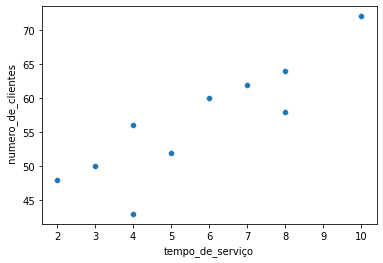

In [46]:
sns.scatterplot(data=df_anos_servicos_clientes , x="tempo_de_serviço" , y = " numero_de_clientes")
plt.show()

Vemos que parece haver alguma relação entre o tempo e o número de clientes. Nesse caso, quanto maior o tempo de serviço, mais clientes os agentes têm.

Vejamos agora outro conjunto de dados.

In [47]:
df_renda_saude = pd.read_csv('correlacao3.csv')

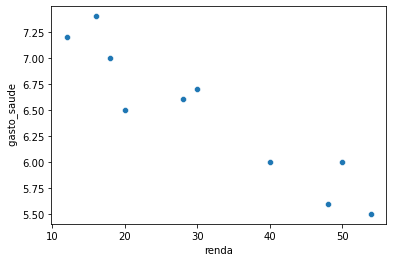

In [48]:
sns.scatterplot(data=df_renda_saude, x="renda", y=' gasto_saude')
plt.show()


Nesse exemplo, podemos ver uma relação inversa, pois quanto maior a renda familiar (em salários mínimos), menor é a tendência de se gastar com assistência médica (% da renda anual)

Por fim, temos um último conjunto de dados para olhar. Vamos carregá-lo.

In [49]:
df_resultado_tempo = pd.read_csv('correlacao2.csv')

In [50]:
df_resultado_tempo

,resultado,tempo
0,45,343
1,52,368
2,61,355
3,70,334
4,74,337
5,76,381
6,80,345
7,90,375


Vamos plotar novamento um gráfico de dispersão com as duas variáveis.

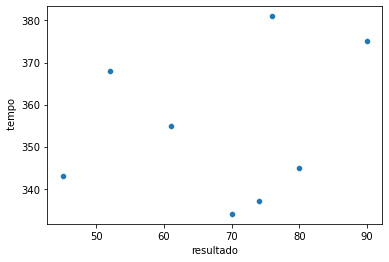

In [51]:
sns.scatterplot(data=df_resultado_tempo, x="resultado", y=' tempo')
plt.show()


Note que, contrariamente aos outros dois gráficos, parece não haver relação muito clara entre as variáveis, isto é, conhecer o resultado do teste de língua estrangeira não nos traz muita informação sobre o tempo que cada operador leverá para operar a máquina.

Nesse tipo de situação, existe pouca ou nenhuma associação. Mas mesmo que qualitativamente tenhamos identificado alguns padrões, não dá para saber, por exemplo, qual associação é mais forte ou fraca.

Para isso, vamos investigar uma estatística que nos ajudará a quantificar essas relações: A correlação.

Existem muitos tipos de associação, inicialmente vamos focar em entender a mais simples delas, que é a linear. Isto é, iremos definir uma medida que avalia o quanto a nuvem de pontos que estamos observando se aproximam de uma reta. Como propriedade importante, a correlação linear sempre estará dentro de um intervalo de -1 a 1.

Vamos observar os gráficos abaixo, cujas nuvens de pontos foram centralizadas.

In [52]:
# criando nuvens de pontos
x = np.linspace(-1,1,100)
y1 = 2*x + np.random.normal(0, 1,len(x))
y2 = -2*x + np.random.normal(0, 1,len(x))
y3 = np.random.normal(0, 1,len(x))

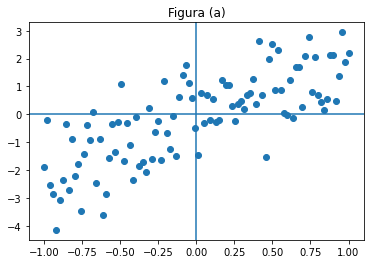

In [53]:
plt.scatter(x,y1)
plt.title('Figura (a)')
plt.axhline(0)
plt.axvline(0)
plt.show()

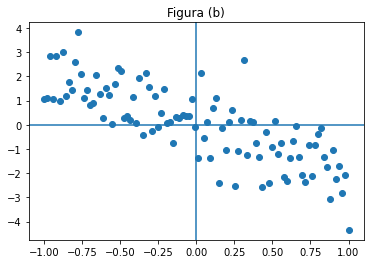

In [54]:
plt.scatter(x,y2)
plt.title('Figura (b)')
plt.axhline(0)
plt.axvline(0)
plt.show()

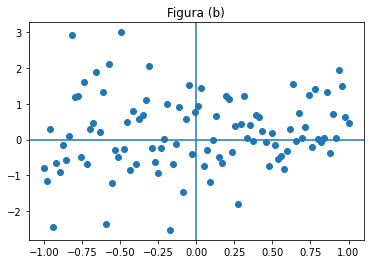

In [55]:
plt.scatter(x,y3)
plt.title('Figura (b)')
plt.axhline(0)
plt.axvline(0)
plt.show()

![]()

Na figura (a), vemos uma associação linear (se aproxima de uma reta) e positiva. Note que a maioria dos pontos estão localizados nos quadrantes 1 e 3. Nesses quadrantes, as coordenadas (x,y) dos pontos possuem o mesmo sinal e, portanto, o produto entre elas é sempre positivo. Se somássemos o produto de todos as coordenadas de todos os pontos, a soma seria positiva, por haver mais pontos localizados nessas regiões.

De maneira análoga, na figura (b) temos o inverso da Figura (a), mais pontos nos quadrantes 2 e 4. Neles, as coordenadas dos pontos possuem sinais distinto e, dessa forma, os produtos resultarão em um número negativo. Nesse caso, havendo mais pontos presentes nessas regiões, as somas desses produtos resultaria em um número negativo.

Por fim, podemos ver que a Figura (c) possui pontos espalhados por todos os quadrantes. Dessa forma, se somarmos os produtos das coordenadas, teremos um valor próximo a zero, pois cada ponto positivo possui seu correspondente simétrico e acabará cancelando na soma.

Alguma semelhança com o X²?

Perceba que estamos somando termos e isso pode crescer indefinidamente, a menos que usemos fatores para isolar o efeito do tamanho da amostra. Para isso iremos utilizar a média dos produtos. 

Bora fazer isso na prática?

Vamos usar o conjunto abaixo para calcular a correlação linear entre as variáveis.

In [74]:
df_anos_servicos_clientes

,tempo_de_serviço,numero_de_clientes,tempo_de_servico - media
0,2,48,-3.7
1,3,50,-2.7
2,4,56,-1.7
3,5,52,-0.7
4,4,43,-1.7
5,6,60,0.3
6,7,62,1.3
7,8,58,2.3
8,8,64,2.3
9,10,72,4.3


1. Subtrair a média (centralizar os dados na média)

In [75]:
media_tempo_de_servico = df_anos_servicos_clientes['tempo_de_serviço'].mean()
media_numero_de_clientes = df_anos_servicos_clientes[' numero_de_clientes'].mean()

Vamos criar uma coluna nova com a subtração da média de cada coluna

In [76]:
df_anos_servicos_clientes['tempo_de_servico - media'] =  \
                    df_anos_servicos_clientes['tempo_de_serviço'] - media_tempo_de_servico

In [77]:
df_anos_servicos_clientes['numero_de_clientes - media'] =  \
                    df_anos_servicos_clientes[' numero_de_clientes'] - media_numero_de_clientes

In [78]:
df_anos_servicos_clientes

,tempo_de_serviço,numero_de_clientes,tempo_de_servico - media,numero_de_clientes - media
0,2,48,-3.7,-8.5
1,3,50,-2.7,-6.5
2,4,56,-1.7,-0.5
3,5,52,-0.7,-4.5
4,4,43,-1.7,-13.5
5,6,60,0.3,3.5
6,7,62,1.3,5.5
7,8,58,2.3,1.5
8,8,64,2.3,7.5
9,10,72,4.3,15.5


Observando as duas colunas, vemos que o produto das coordenadas é mais afetado pela coordenada Y, pois sua variabilidade é maior. Para corrigir esse efeito, precisamos dividir os termos pelo desvio padrão das respectivas amostra.

2. Dividir pelo desvio padrão

In [79]:
desvio_padrao_tempo_de_servico = np.std(df_anos_servicos_clientes['tempo_de_serviço'])
desvio_padrao_numero_clientes = np.std(df_anos_servicos_clientes[' numero_de_clientes'])

In [80]:
df_anos_servicos_clientes['tempo_de_servico_media_escala'] = \
        df_anos_servicos_clientes['tempo_de_servico - media']/desvio_padrao_tempo_de_servico
df_anos_servicos_clientes['numero_de_clientes_media_escala'] = \
        df_anos_servicos_clientes['numero_de_clientes - media']/desvio_padrao_numero_clientes



In [81]:
df_anos_servicos_clientes

,tempo_de_serviço,numero_de_clientes,tempo_de_servico - media,numero_de_clientes - media,tempo_de_servico_media_escala,numero_de_clientes_media_escala
0,2,48,-3.7,-8.5,-1.535019,-1.047469
1,3,50,-2.7,-6.5,-1.120149,-0.801005
2,4,56,-1.7,-0.5,-0.705279,-0.061616
3,5,52,-0.7,-4.5,-0.290409,-0.554542
4,4,43,-1.7,-13.5,-0.705279,-1.663627
5,6,60,0.3,3.5,0.124461,0.431311
6,7,62,1.3,5.5,0.539331,0.677774
7,8,58,2.3,1.5,0.954201,0.184847
8,8,64,2.3,7.5,0.954201,0.924237
9,10,72,4.3,15.5,1.783941,1.910090


Agora a escala das variáveis foi ajustada.

Por fim, vamos multiplicar as novas coordenadas e colocar o resultado numa nova coluna.

3. Multiplicar coordenadas

In [82]:
df_anos_servicos_clientes['x.y'] = \
df_anos_servicos_clientes['tempo_de_servico_media_escala']*df_anos_servicos_clientes['numero_de_clientes_media_escala']

Por último, para isolar o efeito do tamanho da amostra, vamos extraira a média dos produtos.

In [83]:
correlation = df_anos_servicos_clientes['x.y'].mean()

In [84]:
correlation

0.8767952099440144

Como esperado, a correlação é positiva e bem forte!

Vamos visualizar nossos dados centralizados?

Aqui ainda temos o problema de escala.

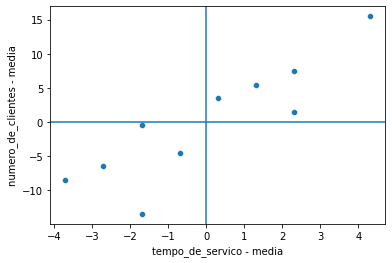

In [85]:
sns.scatterplot(data=df_anos_servicos_clientes, x="tempo_de_servico - media", y='numero_de_clientes - media')
plt.axvline(x=0)
plt.axhline(y=0)
plt.show()

Aqui ainda temos o problema de escala.

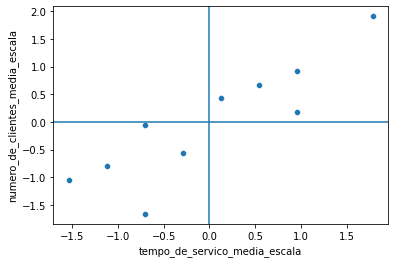

In [87]:
sns.scatterplot(data=df_anos_servicos_clientes, x="tempo_de_servico_media_escala", y='numero_de_clientes_media_escala')
plt.axvline(x=0)
plt.axhline(y=0)
plt.show()

> Pontos de Atenção

Embora poderoso, o método da correlação de pearson pode trazer alguns pontos negativos e aos quais devemos estar atentos.

**NÃO OLHE APENAS OS NÚMEROS**

![](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/05/Misinterpreting-correlations.png)

**CORRELAÇÃO NÃO IMPLICA CAUSA**

![](https://images.megapixl.com/3788/37881989.jpg)

O verão, sol mais intenso, causa o aumento no consumo de produtos como sorvete e também é responsável pelo aumento de casos de insolação.

Se calculássemos uma correlação entre o consumo de sorvete e aumento de casos de insolação, detectaríamos uma correlação positiva! Mas a verdade é que um não causa o outro.

> Provocação: Existe Causa sem Correlação??

## Matriz de Correlação

A Matriz de correlação é um conjunto de correlações entre as variáveis. Variável por variável o método realiza o cálculo e o coloca no formato de dataframe. Usando a biblioteca seaborn, podemos dar um aspecto visual interessante e obter alguns insights.

In [88]:
df_iris = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

<AxesSubplot:>

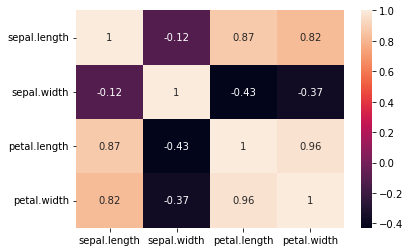

In [89]:
sns.heatmap(df_iris.corr(), annot=True)